In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import statistics
from sklearn import linear_model


In [99]:
data =  pd.read_csv('Tetuan_City_power_consumption_cleaned.csv')
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
43928,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
43929,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
43930,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
43931,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [100]:
def getMonthlyAverageData(data):
    '''
    Calculates the monthly average of each feature in the input DataFrame.

    :param: data
    :type: pd.DataFrame

    :return: DataFrame with monthly average of each feature
    '''
     
    df = data.copy()

    df['DateTime'] = pd.to_datetime(df['DateTime'])

    df.set_index('DateTime', inplace=True)

    # Resample data on a monthly basis and calculate the mean for each feature
    monthly_avg = df.resample('M').mean()
        
    return monthly_avg


def getDailyAverageData(data):
    '''
    Calculates the daily average of each feature in the input DataFrame.

    :param: data
    :type:pd.DataFrame

    :return: DataFrame
    '''
    df=data.copy()

    df['DateTime'] = pd.to_datetime(df['DateTime'])

    df.set_index('DateTime', inplace=True)

    # Resample data on a daily basis 
    daily_avg = df.resample('D').mean()
    
    return daily_avg

def getHourlyAverageData(df):
    '''
    Calculates the hourly average of each feature in the input DataFrame.

    :param: df
    :type: pd.DataFrame

    :return: DataFrame with hourly average of each feature
    '''

    df_copy = df.copy()

    df_copy['DateTime'] = pd.to_datetime(df_copy['DateTime'])

    # Set 'DateTime' column as index
    df_copy.set_index('DateTime', inplace=True)

    hourly_avg = df_copy.resample('H').mean()
    
    hourly_avg['Hour'] = hourly_avg.index.hour
    
    return hourly_avg


def plot_feature_per_month(data, feature):
    '''
    Plots the average value of a specified feature per month.

    :param: data
    :type: dataFrame

    :param feature
    :type: str

    '''
    # Extract the month and data from the DataFrame
    months = data.index.strftime('%Y-%m')
    average_feature = data[feature]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(months, average_feature, color='skyblue')

    plt.title(f'Average {feature.capitalize()} per Month')
    plt.xlabel('Month')
    plt.ylabel(f'{feature.capitalize()}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

def plot_feature_per_daily(data, feature):
    '''
    Plots the average value of a specified feature per month.

    :param: data
    :type: dataFrame

    :param feature
    :type: str

    '''
    # Extract the month and data from the DataFrame
    daily = data.index.strftime('%Y-%m')
    average_feature = data[feature]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(daily, average_feature, color='skyblue')

    plt.title(f'Average {feature.capitalize()} per Day')
    plt.xlabel('Daily')
    plt.ylabel(f'{feature.capitalize()}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()



def barGraphByTimeOfDate(df, feature):
    '''
        Extracts hour component from dataFrame to graph the average temperature for each hour from data
        
        Returns a graph plotting hour of the day vs. average of input feature
        
        :param: df (dataFrame)
        :type: pd.DataFrame
        
        :param: feature
        :type: str
    '''
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Extract the hour component from the DateTime column
    df['Hour'] = df['DateTime'].dt.hour

    hourly_avg_temp = df.groupby('Hour')[feature].mean()

    # Plot the average feature against the hour 
    plt.figure(figsize=(10, 6))
    plt.bar(hourly_avg_temp.index, hourly_avg_temp.values, color='skyblue')
    plt.title(f'Average {feature} Change Throughout the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Temperature')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(axis='y')
    plt.show()

def barGraphByMonth(df, feature):
    '''
        Extracts hour component from dataFrame to graph the average temperature for each hour from data
        Returns a graph plotting hour of the day vs. average of input feature
    
        :param: df 
        :type: pd.DataFrame
        
        :param: feature
        :type: str
    '''
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Extract the month component 
    df['Month'] = df['DateTime'].dt.month

    monthly_avg = df.groupby('Month')[feature].mean()

    # Plot the average feature against the month as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')
    plt.title(f'Average {feature} Change Throughout the Month')
    plt.xlabel('Month')
    plt.ylabel(f'Average {feature}')
    plt.grid(axis='y')
    plt.show()

def plot_daily_data_for_month(daily_data, desired_month, feature):
    '''
    Plots the daily data for a specified month and feature.

    :param daily_data
    :type dataFrame
    :param desired_month
    :type str
    :param feature
    :type  str

    :return: None
    '''
    daily_data_desired_month = daily_data[daily_data.index.strftime('%Y-%m') == desired_month]
    
    days = daily_data_desired_month.index.day
    feature_values = daily_data_desired_month[feature]

    plt.figure(figsize=(10, 6))
    plt.bar(days, feature_values, color='skyblue')
    plt.title(f'Average {feature} for {desired_month}')
    plt.xlabel('Day of Month')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_hourly_data_for_day(hourly_data, desired_day, feature):
    '''
    Plots the hourly data for a specified day and feature.

    :param: hourly_data
    :type: dataFrame

    :param: desired_day
    :type: str

    :param: feature
    :type: str

    :return: None
    '''
    hourly_data_desired_day = hourly_data[hourly_data.index.date == pd.to_datetime(desired_day).date()]
    hours = hourly_data_desired_day.index.hour
    feature_values = hourly_data_desired_day[feature]

    plt.figure(figsize=(10, 6))
    plt.bar(hours, feature_values, color='skyblue')
    plt.title(f'Average {feature} for {desired_day}')
    plt.xlabel('Hour of Day')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [101]:
# Create dataframes for average monthly, daily, and hourly data
monthly_avg = getMonthlyAverageData(data)

daily_avg = getDailyAverageData(data)

hourly_avg = getHourlyAverageData(data)


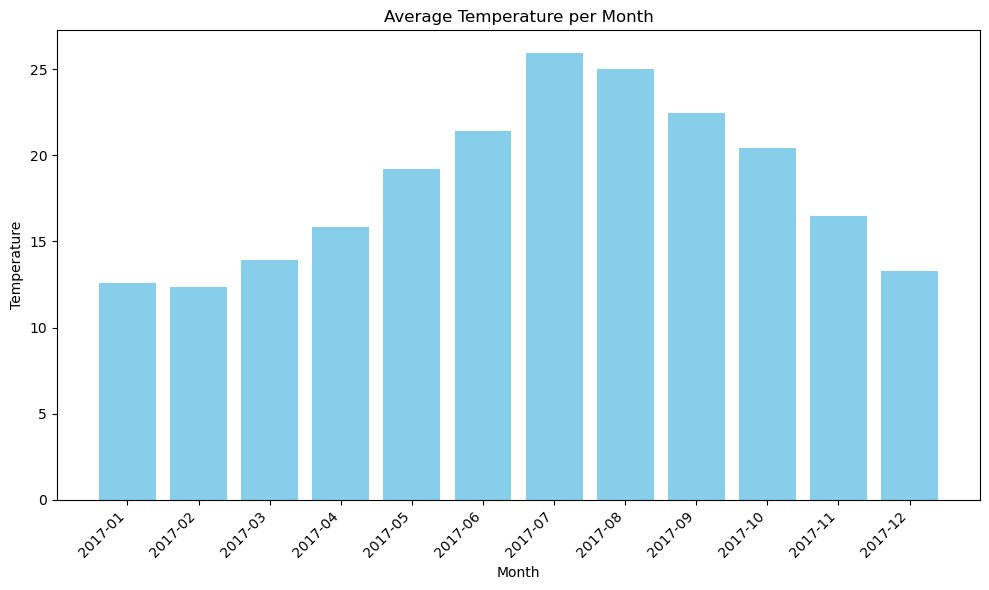

In [102]:
plot_feature_per_month(monthly_avg,'Temperature')

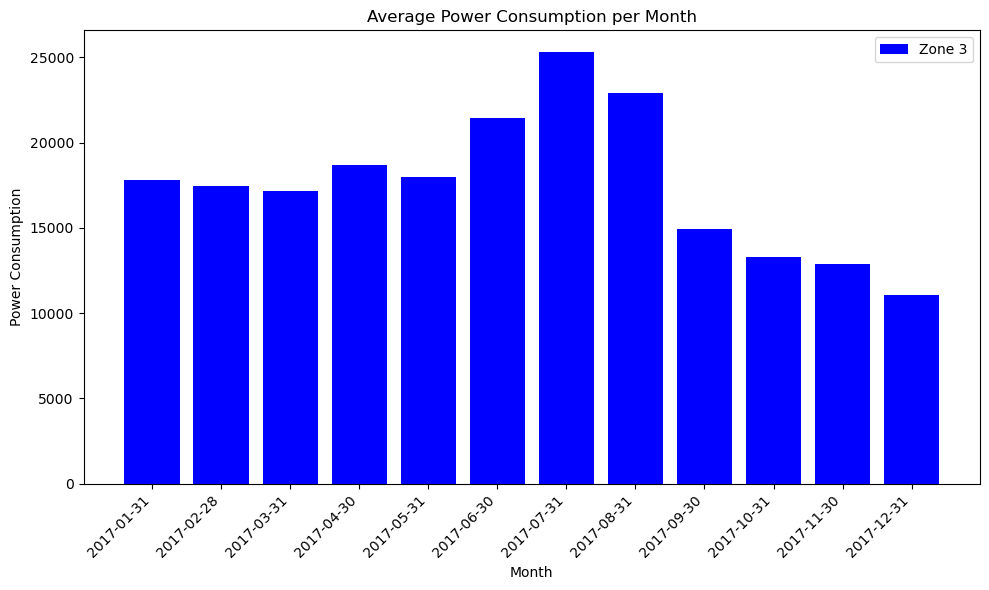

In [103]:
## This plot shows the average power consumption by zone per month, Can be used to compare against other per monthly features

months = monthly_avg.index.strftime('%Y-%m-%d')
# zone1_power = monthly_avg['Zone 1 Power Consumption']
# zone2_power = monthly_avg['Zone 2  Power Consumption']
zone3_power = monthly_avg['Zone 3  Power Consumption']

plt.figure(figsize=(10, 6))
# plt.bar(months, zone1_power, color='red', label='Zone 1')
# plt.bar(months, zone2_power, bottom=zone1_power, color='green', label='Zone 2')
plt.bar(months, zone3_power, color='blue', label='Zone 3')

plt.title('Average Power Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45, ha='right')  
plt.legend() 

plt.tight_layout()
plt.show()

In [104]:
### Replaced by reusable function ### 

# months = monthly_avg.index.strftime('%Y-%m')
# average_temperatures = monthly_avg['Humidity']

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(months, average_temperatures, color='skyblue')

# # Customize the plot
# plt.title('Average Humidity per Month')
# plt.xlabel('Month')
# plt.ylabel('Humidity (%)')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()

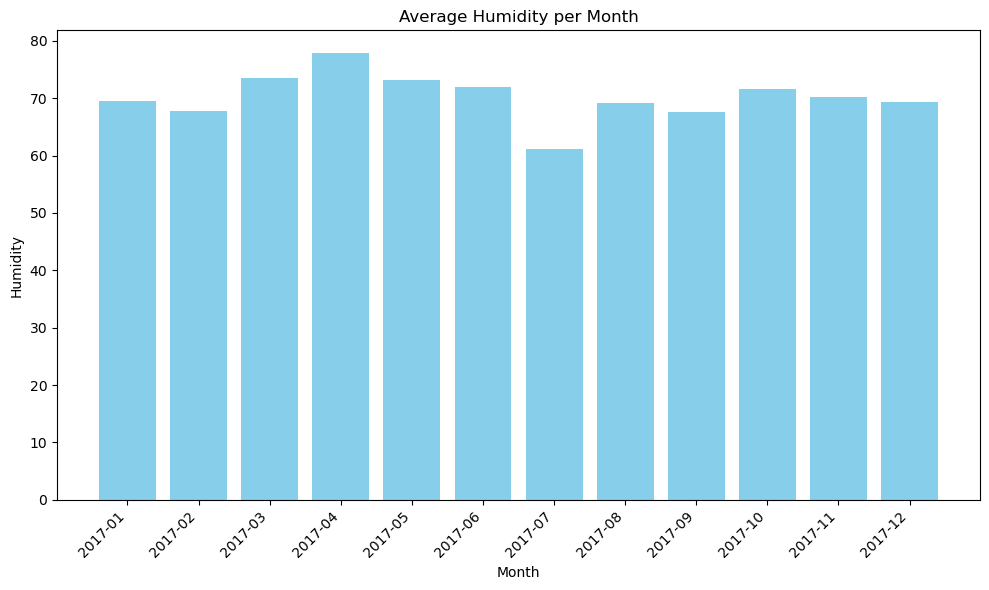

In [105]:
plot_feature_per_month(monthly_avg,'Humidity')

In [106]:
print(monthly_avg.head())

            Temperature   Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                
2017-01-31    12.562325  69.601279    0.706876              73.092957   
2017-02-28    12.366020  67.795900    1.086686              74.103892   
2017-03-31    13.901628  73.593676    0.998285             117.943334   
2017-04-30    15.849444  77.955355    0.187623              83.908541   
2017-05-31    19.216088  73.127771    2.159918              89.163482   

            diffuse flows  Zone 1 Power Consumption  \
DateTime                                              
2017-01-31      33.866809              30759.781148   
2017-02-28      35.799526              30641.862283   
2017-03-31      39.271146              30878.493914   
2017-04-30      46.324977              30821.803920   
2017-05-31      38.480440              31979.620089   

            Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                           

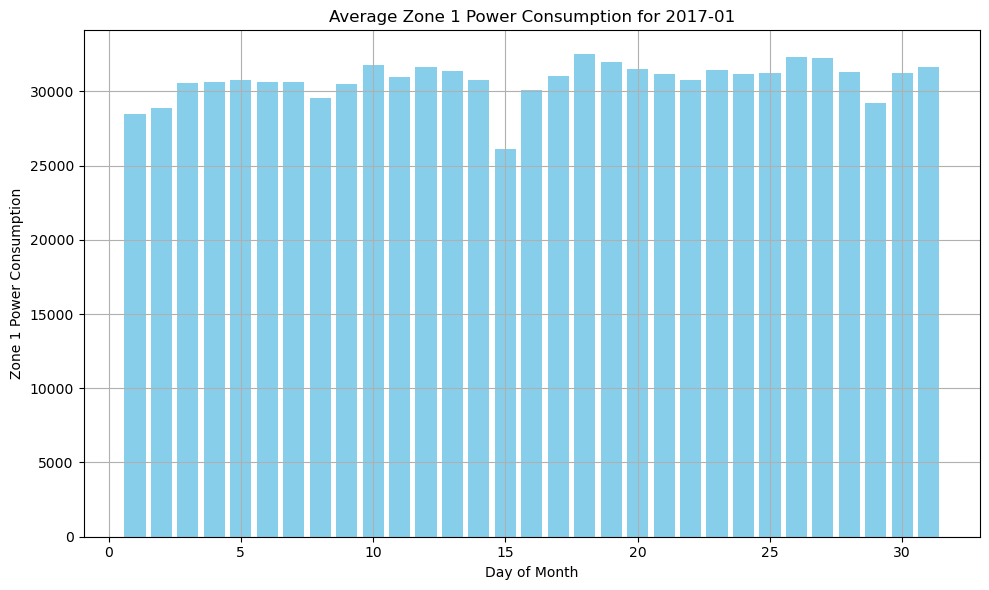

In [107]:
### Comparing Daily Avg Power of a Month of Zone 1, modify to change zone or month to compare ###
plot_daily_data_for_month(daily_avg, '2017-01', 'Zone 1 Power Consumption')

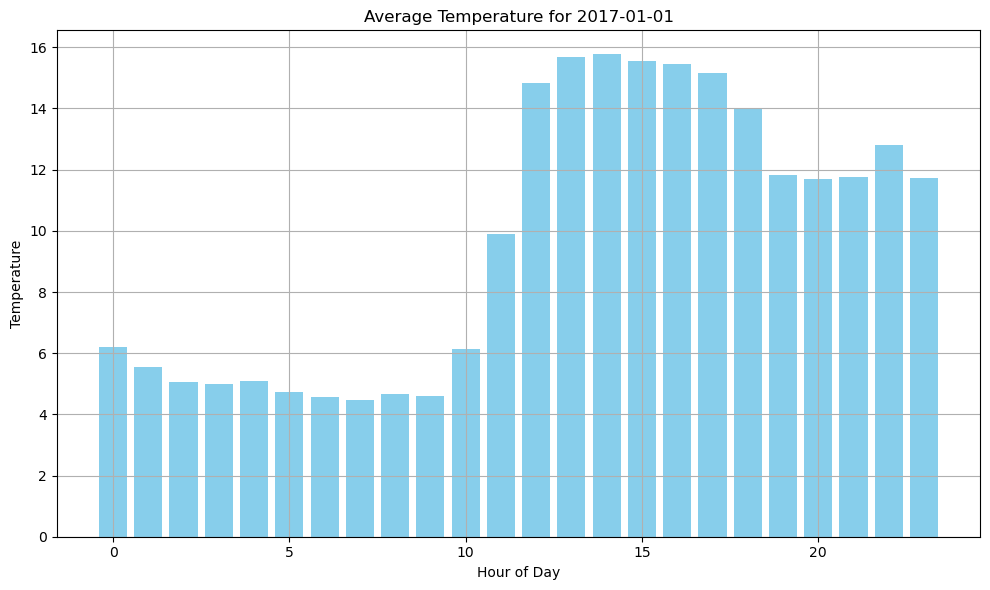

In [108]:
### Comparing Daily Avg Temperature of a, change day or feature field ###
plot_hourly_data_for_day(hourly_avg, '2017-01-01', 'Temperature')

<AxesSubplot:>

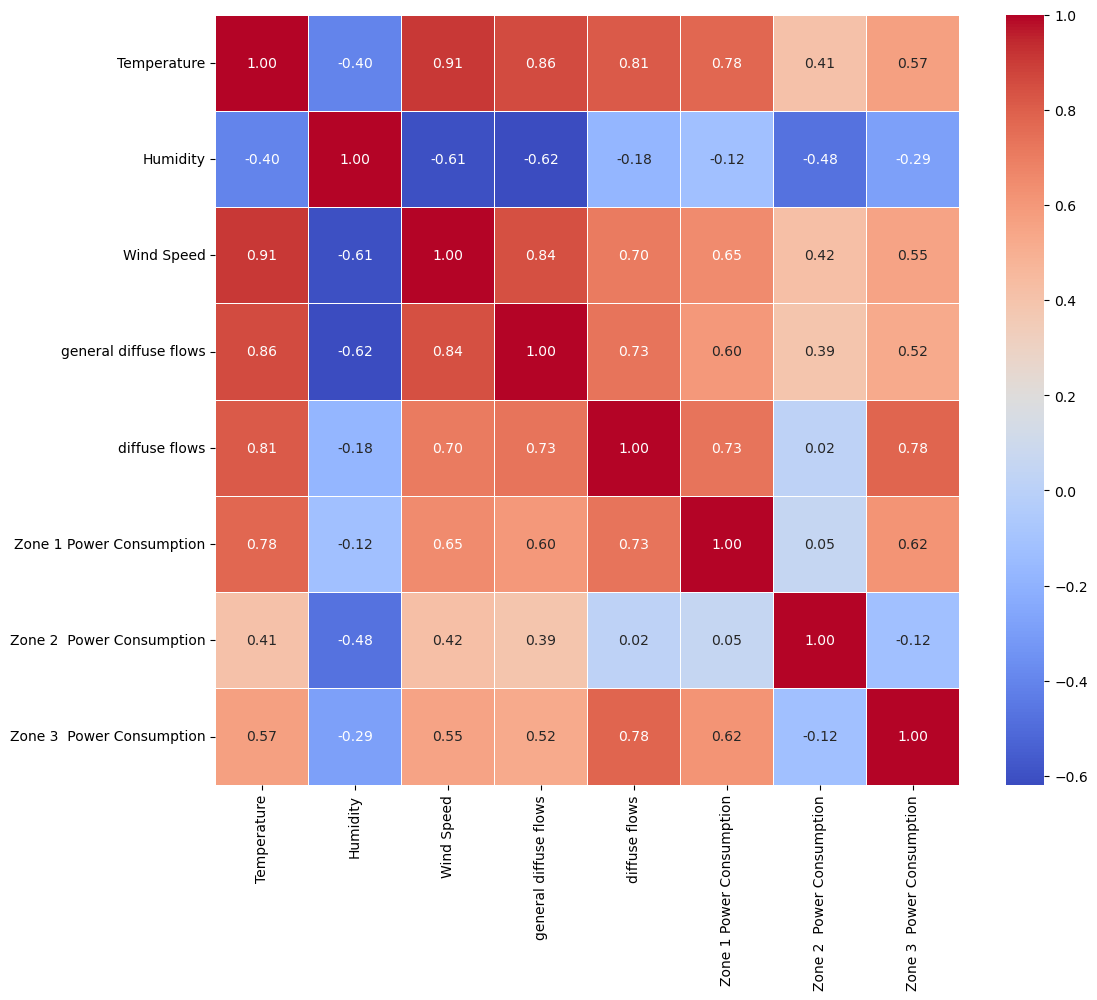

In [109]:
###  Correlation map to visually see which features have correlation with each each, want to determine against power consumption ###

correlation_matrix = monthly_avg.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

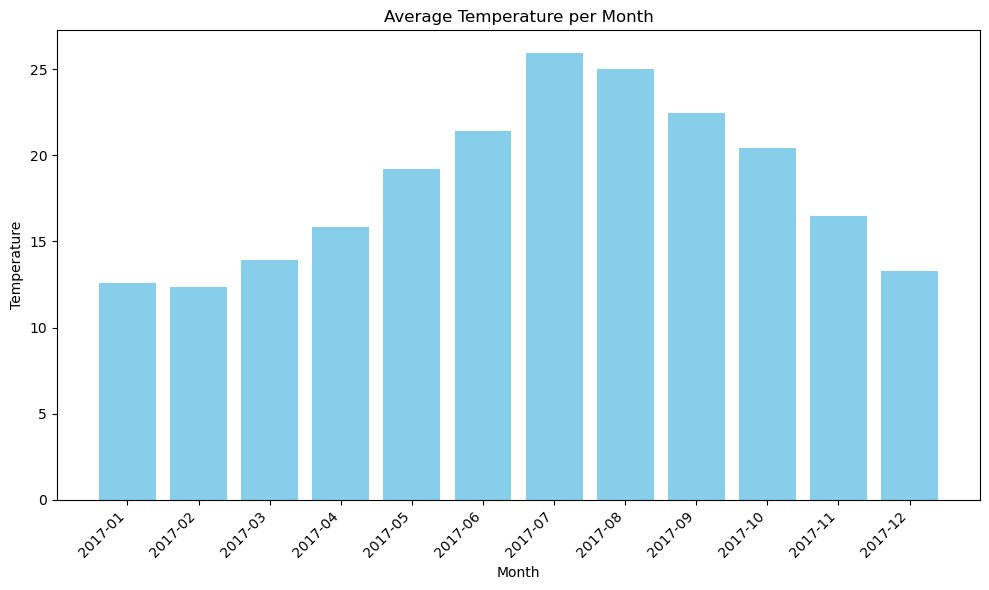

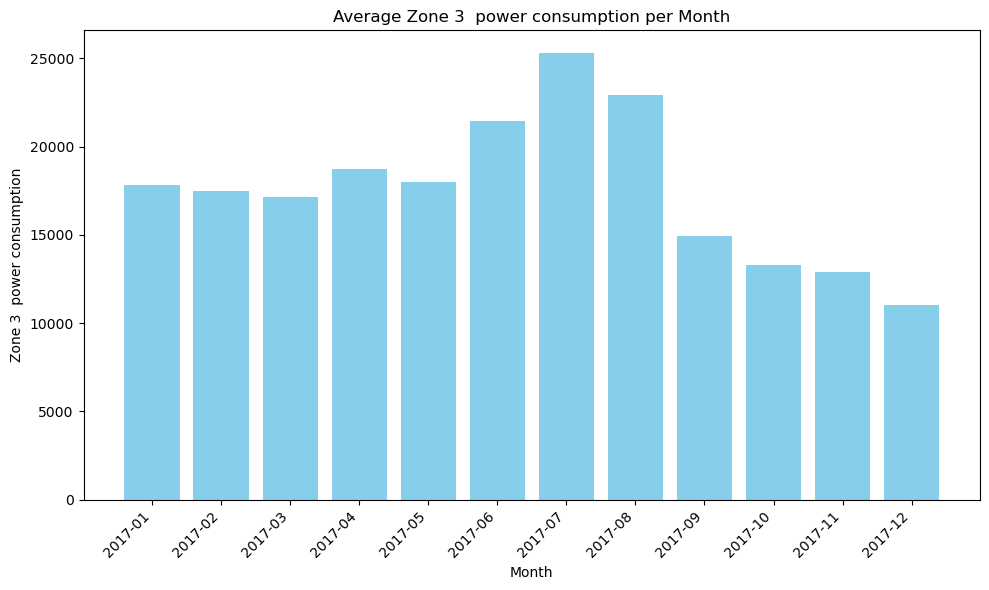

In [110]:

plot_feature_per_month(monthly_avg,'Temperature')
plot_feature_per_month(monthly_avg,'Zone 3  Power Consumption' )


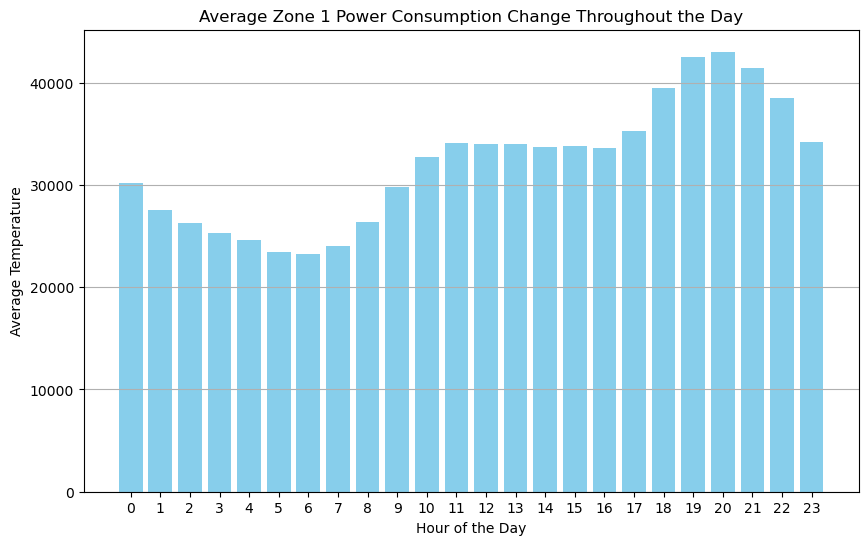

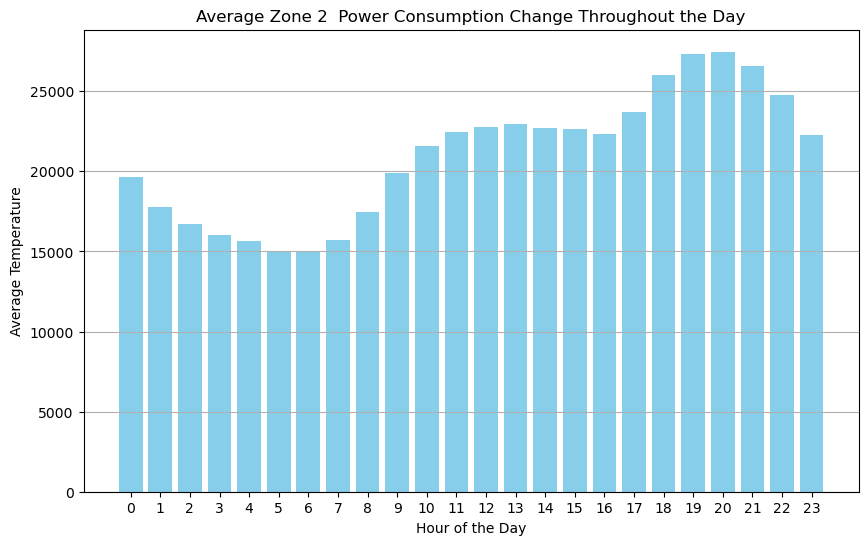

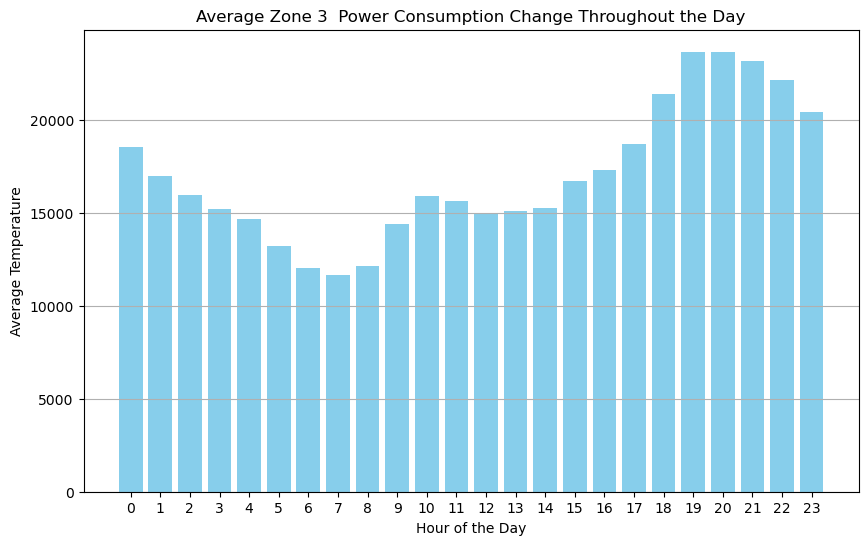

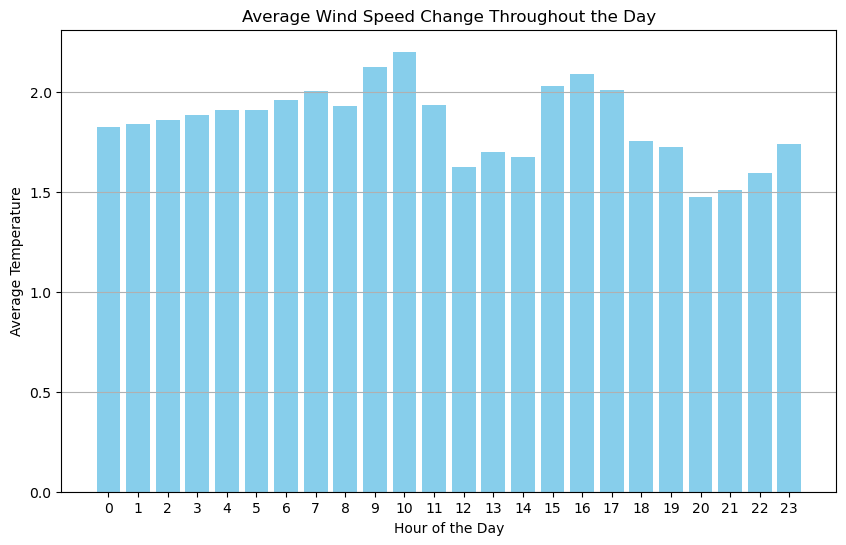

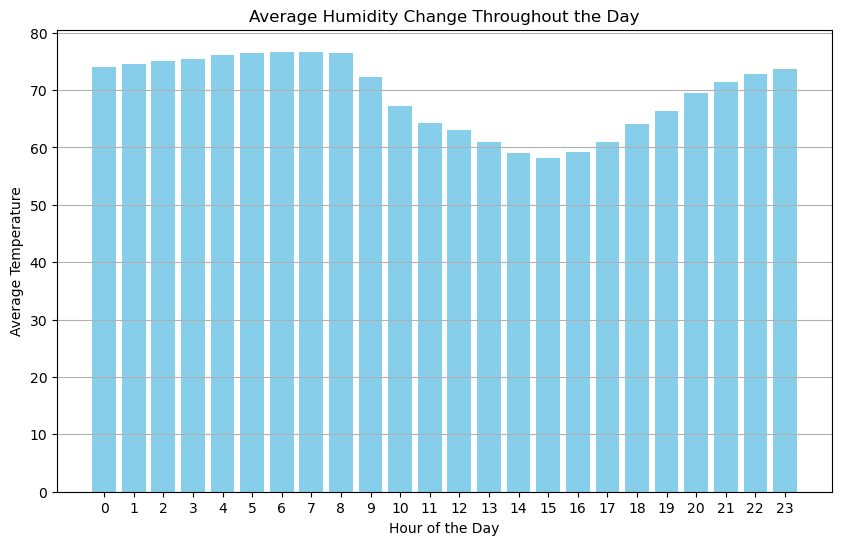

In [111]:
barGraphByTimeOfDate(data, 'Zone 1 Power Consumption')
barGraphByTimeOfDate(data, 'Zone 2  Power Consumption')
barGraphByTimeOfDate(data, 'Zone 3  Power Consumption')
barGraphByTimeOfDate(data, 'Wind Speed')
barGraphByTimeOfDate(data, 'Humidity')

In [112]:
df = pd.read_csv("Tetuan_City_power_consumption_cleaned.csv", parse_dates=['DateTime'], index_col='DateTime')

In [113]:
def plotEnergyConsumptionEachZoneDaily(data):
    df = data.copy()
    df = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
    
    df_daily = df.resample('D').sum()
    
    df_daily.plot(figsize=(12, 6))
    plt.title('Daily Energy Consumption for Each Zone')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.show()

In [114]:
def plotEnergyConsumptionMonthly(data):
    df = data.copy()
    df = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
    
    # Analyze seasonal variations using monthly averages
    monthly_average = df.resample('M').mean()
    monthly_average.plot(kind='bar', figsize=(12, 6))
    plt.title('Monthly Average Energy Consumption for Each Zone')
    plt.xlabel('Month')
    plt.ylabel('Average Energy Consumption')
    plt.xticks(rotation=45)
    plt.show()

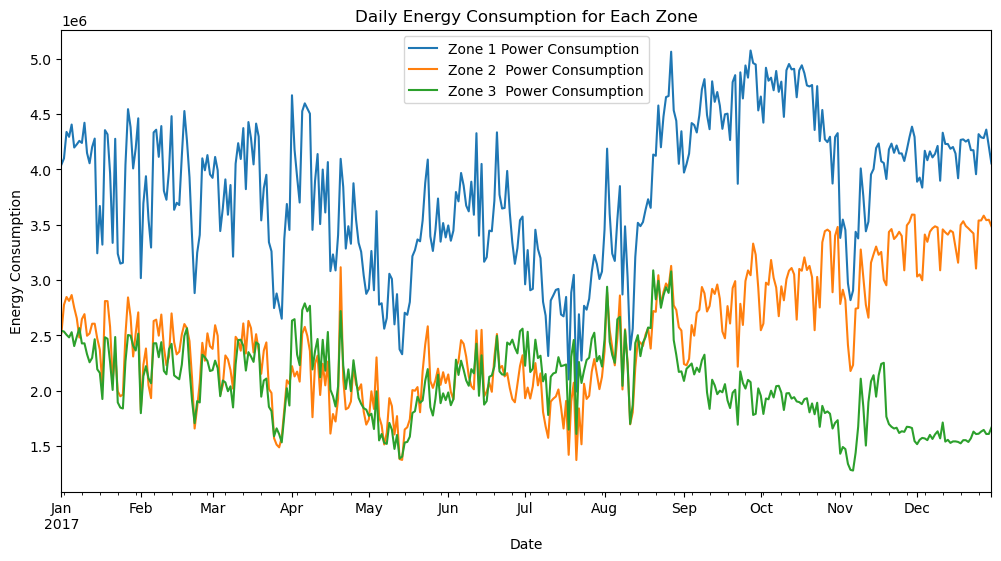

In [115]:
plotEnergyConsumptionEachZoneDaily(df)

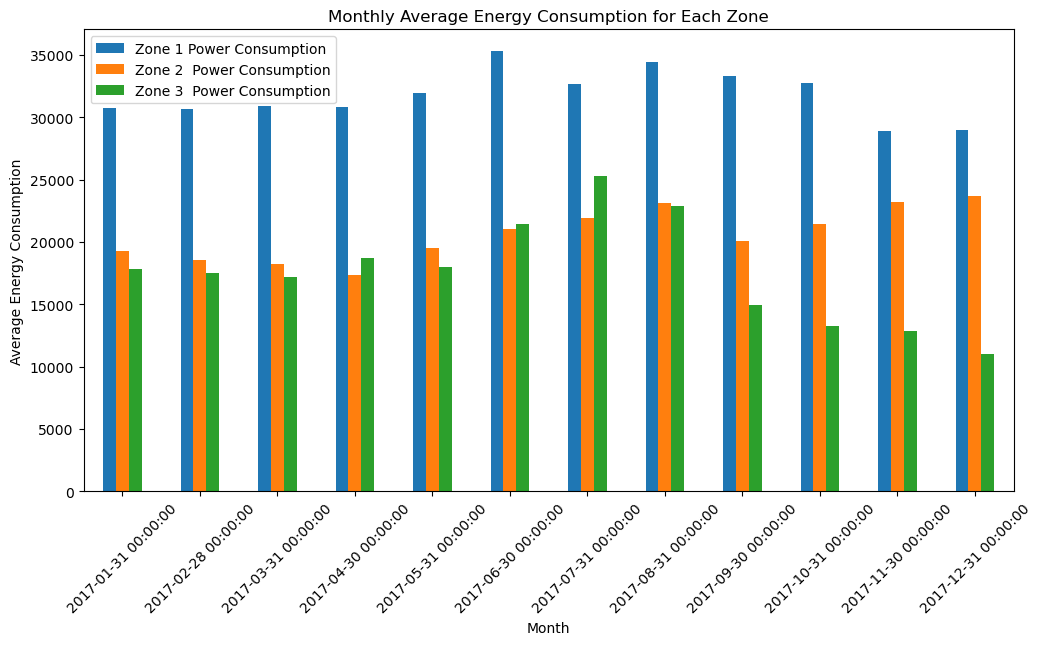

In [116]:
plotEnergyConsumptionMonthly(df)

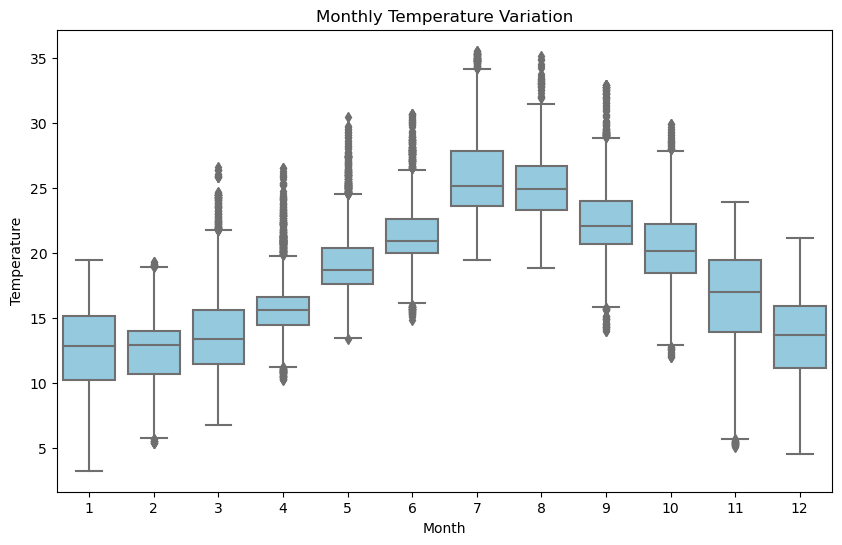

In [117]:
# 1. Monthly Temperature Variation
df = data.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month'] = df['DateTime'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature', data=df, color='skyblue')
plt.title('Monthly Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

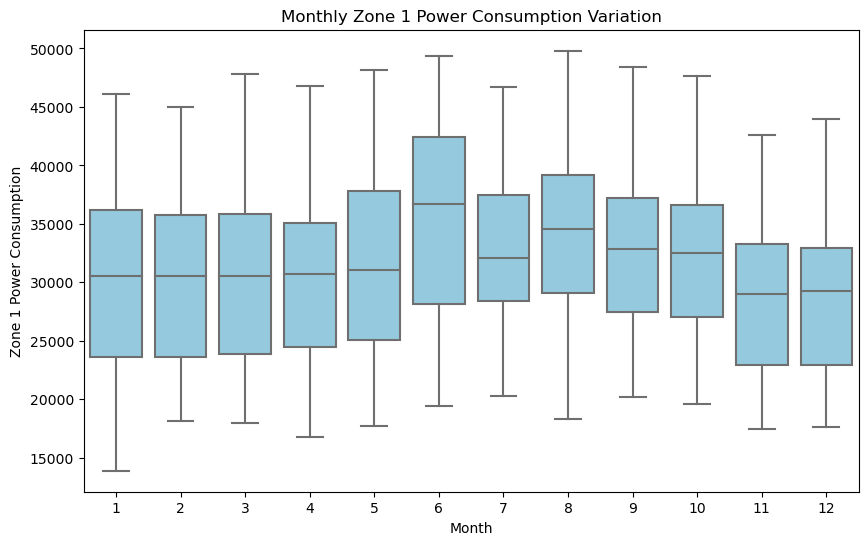

In [118]:
# Montly Power Consumption Variation
df = data.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Month'] = df['DateTime'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Zone 1 Power Consumption', data=df, color='skyblue')
plt.title('Monthly Zone 1 Power Consumption Variation')
plt.xlabel('Month')
plt.ylabel('Zone 1 Power Consumption')
plt.show()

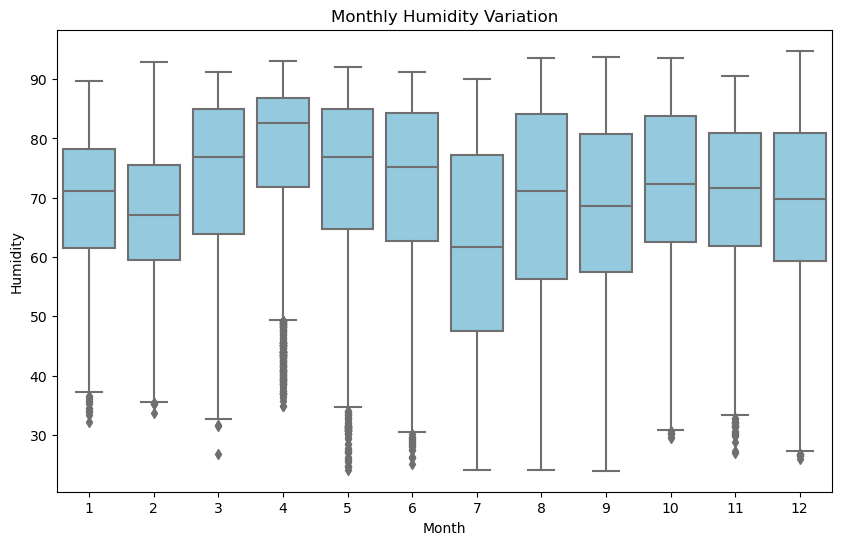

In [119]:
df = data.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month'] = df['DateTime'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Humidity', data=df, color='skyblue')
plt.title('Monthly Humidity Variation')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.show()

In [120]:
'''
Quick Analysis from charts:
1. Monthly temperature
2. Hour of the day
3. Humidity does not have any affect
4. Wind speed a possibility of effect

'''

'\nQuick Analysis from charts:\n1. Monthly temperature\n2. Hour of the day\n3. Humidity does not have any affect\n4. Wind speed a possibility of effect\n\n'

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotFeatureZoneVariation(data, feature, zone):
    '''a function to plot the feature variation and the specific zone's power consumption 
    variation for each hour of the day.
    Input: data(DataFrame of whole data we are analyzing), 
           feature(string of the feature we want to see the variation)
           zone(string of the zone's name)'''
    
    
    df = data.copy()
    
    # convert DateTime column to datetime type
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # extract hour from DateTime
    df['Hour'] = df['DateTime'].dt.hour

    plt.figure(figsize=(12, 6))

    # plot feature variation
    plt.subplot(2, 1, 1)
    sns.boxplot(x='Hour', y=feature, data=df, color='skyblue')
    plt.title(f'Daily {feature} Variation')
    plt.xlabel('Hour')
    plt.ylabel(f'{feature}')

    # plot zone power consumption variation
    plt.subplot(2, 1, 2)
    sns.boxplot(x='Hour', y=f'{zone}', data=df, color='skyblue')
    plt.title(f'Daily {zone} Variation')
    plt.xlabel('Hour')
    plt.ylabel(f'{zone}')

    plt.tight_layout()
    plt.show()

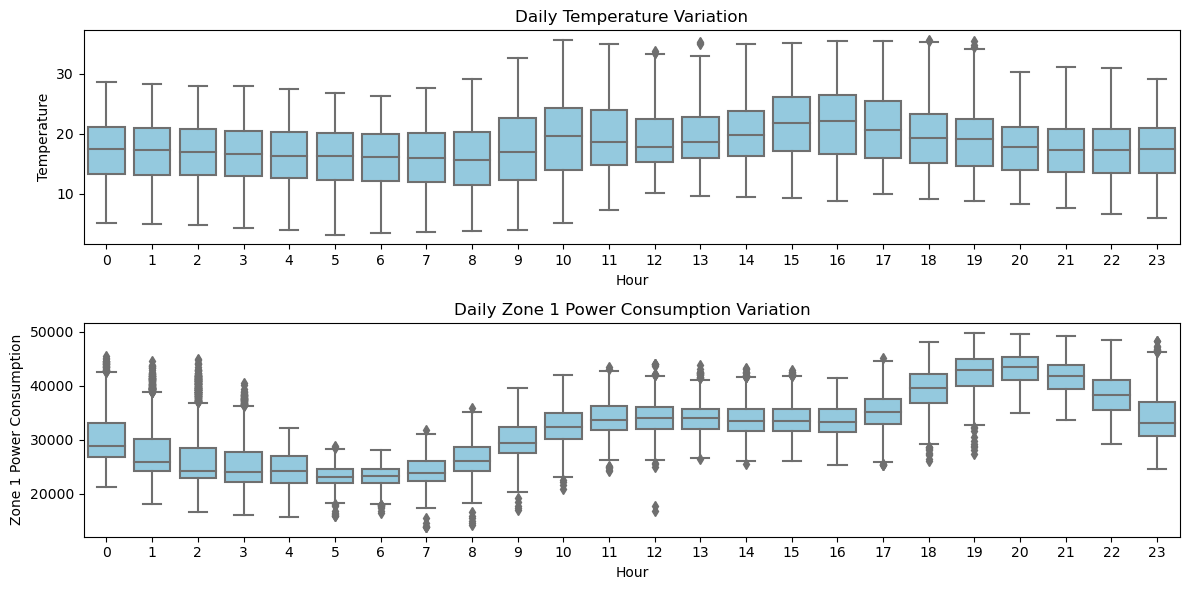

In [122]:
plotFeatureZoneVariation(data, 'Temperature', 'Zone 1 Power Consumption')

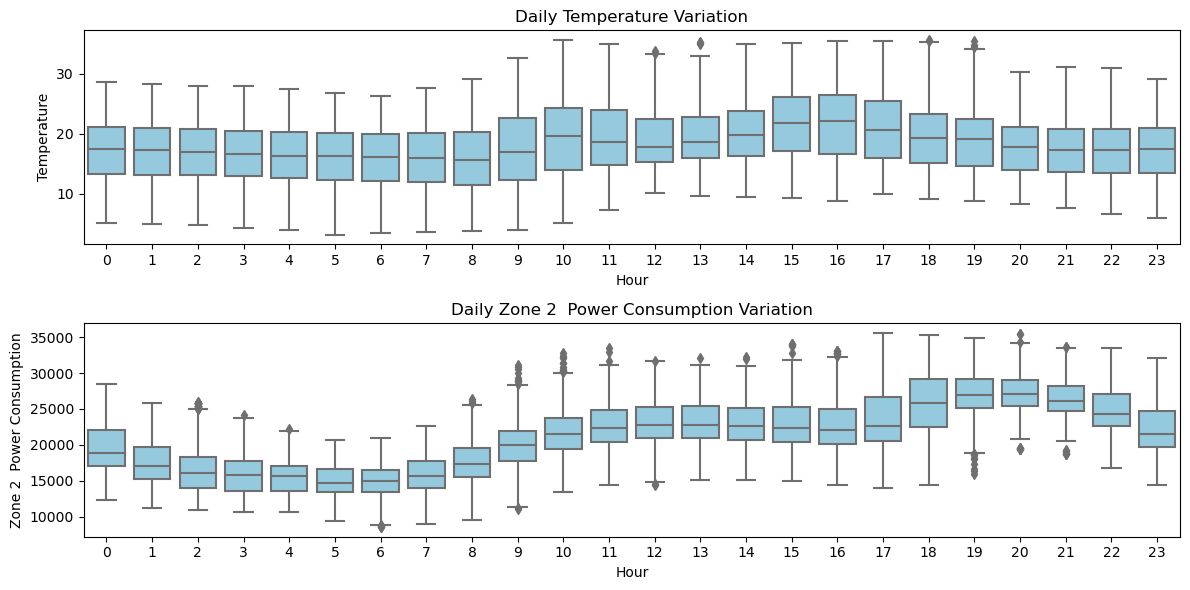

In [123]:
plotFeatureZoneVariation(data, 'Temperature', 'Zone 2  Power Consumption')

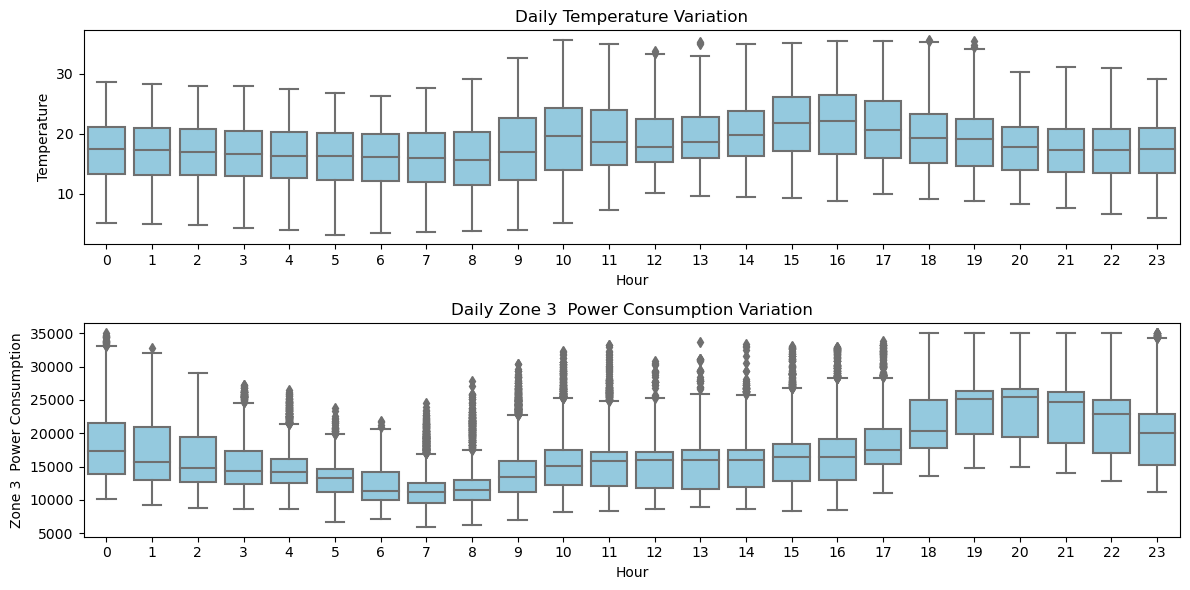

In [124]:
plotFeatureZoneVariation(data, 'Temperature', 'Zone 3  Power Consumption')

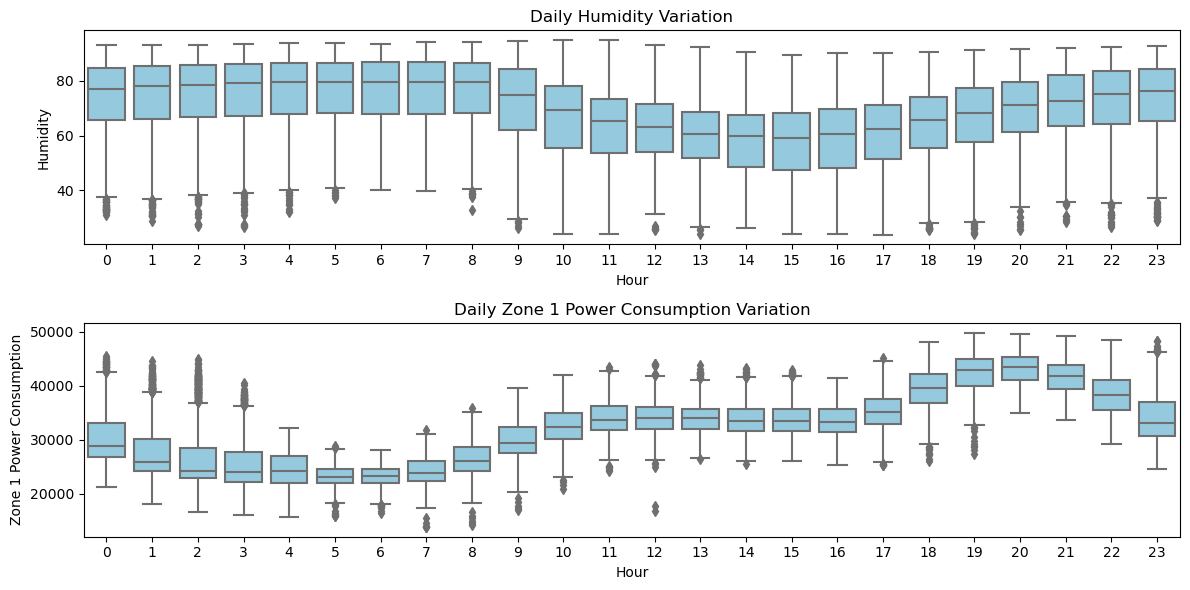

In [125]:
plotFeatureZoneVariation(data, 'Humidity', 'Zone 1 Power Consumption')

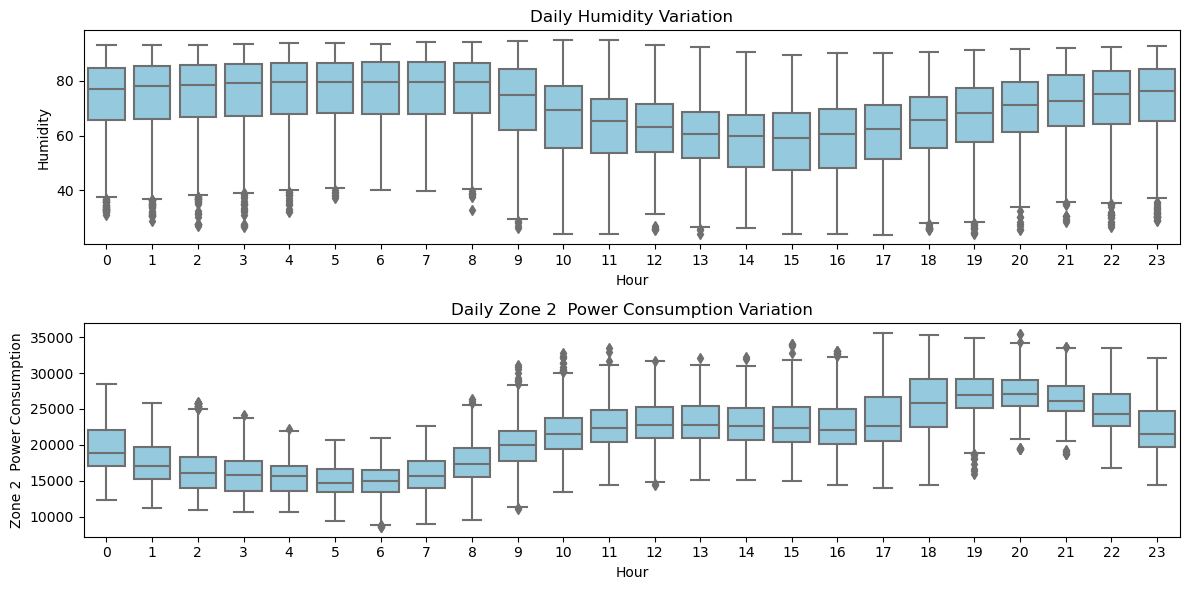

In [126]:
plotFeatureZoneVariation(data, 'Humidity', 'Zone 2  Power Consumption')

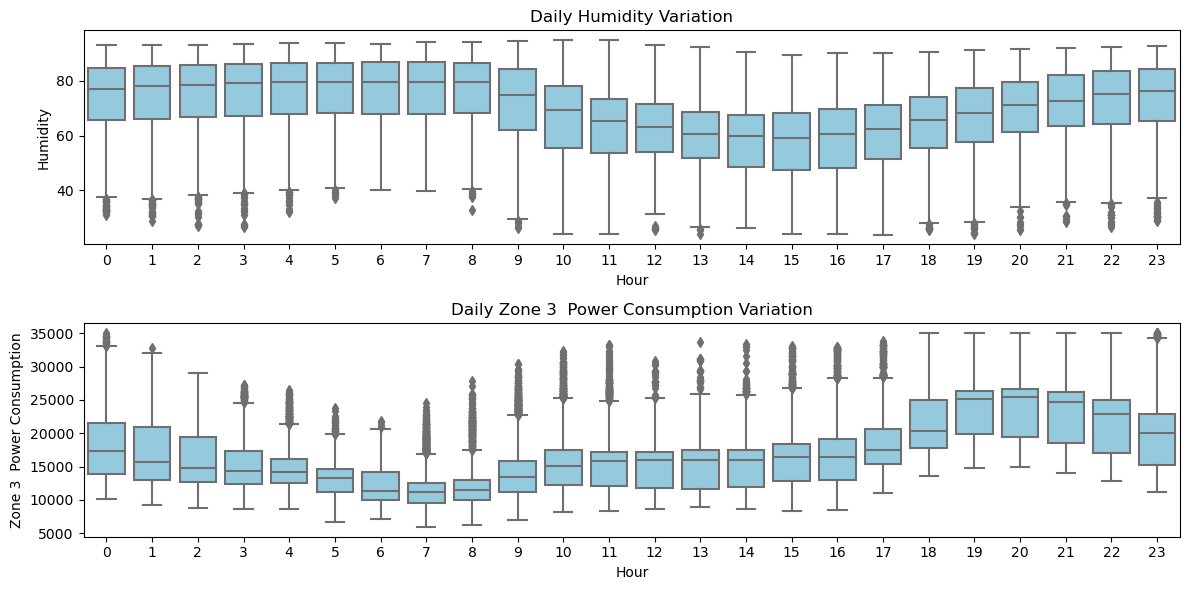

In [127]:
plotFeatureZoneVariation(data, 'Humidity', 'Zone 3  Power Consumption')

In [128]:
from sklearn.ensemble import RandomForestRegressor

def findFeatureImportances(data):
    '''a function to find the importance of all the features in dataset that 
    influence on power consumption of each zone.
    Input: data(DataFrame of whole data we are analyzing)
    Output: feature_importance_dfs(DataFrame of feature importances)'''

    df = data.copy()

    # define features and target variable
    columns_to_drop = ['DateTime']
    df = df.drop(columns=columns_to_drop)
    features = df.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']).columns
    targets = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
    
    
    rfs = {}
    for target in targets:
        # split the data into features and target variable
        X = df[features].values
        y = df[target].values

        # initialize and train the Random Forest Regressor model
        rf = RandomForestRegressor()
        rf.fit(X, y)
        rfs[target] = rf
        
        
    # extract feature importances from the trained models for each zone
    feature_importances = {}
    for target, rf in rfs.items():
        feature_importances[target] = rf.feature_importances_    


    # create DataFrames to display feature importances for each zone
    feature_importance_dfs = {}
    for target, importance in feature_importances.items():
        feature_importance_dfs[target] = pd.DataFrame({'Feature': features, 'Importance': importance})
        feature_importance_dfs[target] = feature_importance_dfs[target].sort_values(by='Importance', ascending=False)
    
    return feature_importance_dfs

In [129]:
def plotFeatureImportances(feature_importance_dfs):
    '''a function to plot the importance of all the features in dataset that 
    influence on power consumption of each zone.
    Input: feature_importance_dfs(DataFrame of feature importances)'''
    
    # find the maximum importance score across all zones
    max_importance = max([df['Importance'].max() for df in feature_importance_dfs.values()])
    
    # plot feature importances for each zone (Horizontal Bar Plot)
    fig, axs = plt.subplots(len(feature_importance_dfs), 1, figsize=(8, 3*len(feature_importance_dfs)), sharex=True)
    for ax, (target, df) in zip(axs, feature_importance_dfs.items()):
        ax.barh(df['Feature'], df['Importance'], color='skyblue')
        ax.set_title(f'Feature Importances for {target}')
        ax.set_ylabel('Feature')

    plt.xlabel('Importance')
    # set the same scale for all plots
    plt.xlim(0, max_importance * 1.1)
    plt.tight_layout()
    plt.show()

In [130]:
feature_importance_dfs = findFeatureImportances(data)

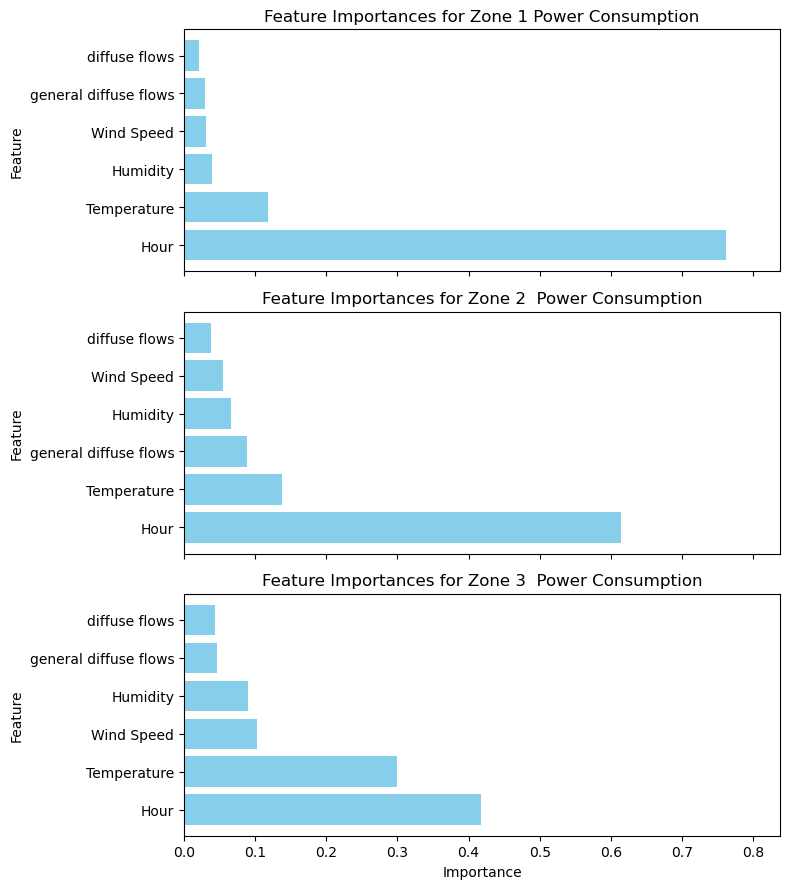

In [131]:
plotFeatureImportances(feature_importance_dfs)